In [1]:
from transformers import AutoTokenizer, AddedToken
from datasets import load_dataset

MODEL_NAME = "microsoft/deberta-v3-base"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer.add_tokens(AddedToken("\n", normalized=False))

/Users/shinichiro.saito/automated_essay_scoring/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/shinichiro.saito/automated_essay_scoring/.venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/shinichiro.saito/automated_essay_scoring/.venv/lib/python3.11/site-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


1

In [3]:
train_dataset = load_dataset(
    "csv",
    data_files={
        "train": "/Users/shinichiro.saito/automated_essay_scoring/data/train.csv"
    },
    split="train",
)

train_dataset

Generating train split: 17307 examples [00:00, 42606.47 examples/s]


Dataset({
    features: ['essay_id', 'full_text', 'score'],
    num_rows: 17307
})

In [5]:
import os

os.environ["TOKENIZERS_PARALLELISM"] = "true"
NUM_PROC = os.cpu_count()

In [7]:
def preprocess_function(examples):
    return tokenizer(
        examples["full_text"],
        truncation=False,
    )


train_dataset = train_dataset.map(preprocess_function, batched=True, num_proc=NUM_PROC)

Setting TOKENIZERS_PARALLELISM=false for forked processes.
Map (num_proc=8): 100%|██████████| 17307/17307 [00:04<00:00, 3852.07 examples/s]


In [10]:
train_dataset

Dataset({
    features: ['essay_id', 'full_text', 'score', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 17307
})

In [11]:
train_dataset = train_dataset.map(
    lambda examples: {"token_length": len(examples["input_ids"])},
    num_proc=NUM_PROC,
)

Setting TOKENIZERS_PARALLELISM=false for forked processes.
Map (num_proc=8): 100%|██████████| 17307/17307 [00:01<00:00, 17165.27 examples/s]


In [15]:
token_length = train_dataset["token_length"]

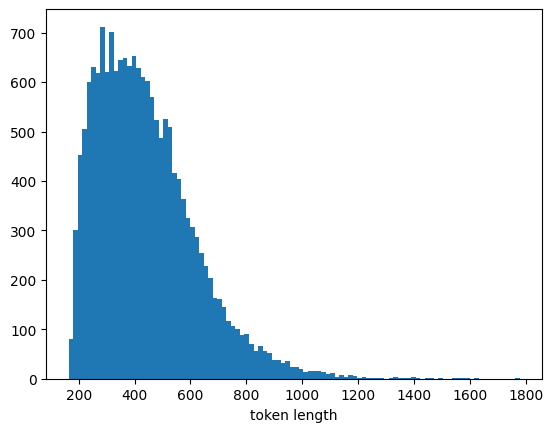

In [21]:
import matplotlib.pyplot as plt

plt.hist(token_length, bins=100)
plt.xlabel("token length")

In [40]:
all_num = len(token_length)

# 1024以下の割合
num = sum([True if length <= 1024 else False for length in token_length])
print(f"{num}/{all_num} = {num/all_num:.4f}")

# 1536以下の割合
num = sum([True if length <= 1536 else False for length in token_length])
print(f"{num}/{all_num} = {num/all_num:.4f}")

# 1536以下の割合
num = sum([True if length <= 1792 else False for length in token_length])
print(f"{num}/{all_num} = {num/all_num:.4f}")

# 2048以下の割合
num = sum([True if length <= 2048 else False for length in token_length])
print(f"{num}/{all_num} = {num/all_num:.4f}")

17170/17307 = 0.9921
17300/17307 = 0.9996
17307/17307 = 1.0000
17307/17307 = 1.0000
